In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from scipy import stats
import seaborn as sns

#### This is my data exploration practice with the superstore data that i acquired from kaggle. This was done for practice purpose only and its a work in progress

#### Lets import our .csv data

In [5]:
df = pd.read_csv('train.csv', index_col = 0)
df.shape

(9800, 17)

#### lets take a look at our dataframe

In [4]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


#### lets check if we have any null values in our data

In [4]:
df.isnull().sum() # we have one columns with 11 null values, we can  delete these because it roughly amounts to 0.1% of our data

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

#### we can deal with the null values in two ways, one my deleting them, other by filling them based on their city

In [5]:
df[df['Postal Code'].isnull()] # outputs the observations with null values for Postal Code, lets take a look:

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94


#### we can see that the missing postal code is for burlington, Vermont, lets look at the rest of the dataframe to check if there is Burlington, Vermont with zipcode that we can use

In [6]:
df[df.City == "Burlington"] # turns out, every observation with city Burlington and state Vermont are missing postal code
                            # we will then google the zip code for burlington, Vermont and fill it with fillna

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
684,US-2018-168116,04/11/2018,04/11/2018,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,North Carolina,27217.0,South,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980
685,US-2018-168116,04/11/2018,04/11/2018,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,North Carolina,27217.0,South,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,167.440
1009,US-2018-106705,26/12/2018,01/01/2019,Standard Class,PO-18850,Patrick O'Brill,Consumer,United States,Burlington,Iowa,52601.0,Central,OFF-PA-10001509,Office Supplies,Paper,"Recycled Desk Saver Line ""While You Were Out"" ...",44.750
1039,CA-2018-121818,20/11/2018,21/11/2018,First Class,JH-15430,Jennifer Halladay,Consumer,United States,Burlington,North Carolina,27217.0,South,OFF-AR-10000203,Office Supplies,Art,Newell 336,23.968
1040,CA-2018-121818,20/11/2018,21/11/2018,First Class,JH-15430,Jennifer Halladay,Consumer,United States,Burlington,North Carolina,27217.0,South,OFF-AR-10004790,Office Supplies,Art,Staples in misc. colors,28.728
1394,CA-2018-124828,03/07/2018,04/07/2018,First Class,YS-21880,Yana Sorensen,Corporate,United States,Burlington,North Carolina,27217.0,South,OFF-AR-10003514,Office Supplies,Art,4009 Highlighters by Sanford,9.552
2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.030
2929,US-2018-120390,19/10/2018,26/10/2018,Standard Class,TH-21550,Tracy Hopkins,Home Office,United States,Burlington,North Carolina,27217.0,South,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,1633.188
5066,CA-2018-142090,30/11/2018,07/12/2018,Standard Class,SC-20380,Shahid Collister,Consumer,United States,Burlington,North Carolina,27217.0,South,TEC-AC-10002001,Technology,Accessories,Logitech Wireless Gaming Headset G930,383.976


#### There are few different options to choose from for zipcode, we will go with 05408, so, lets fill the df with this

In [7]:
df['Postal Code'] = df['Postal Code'].fillna('05408')

In [8]:
df['Postal Code'] = df['Postal Code'].astype(float)
df.dtypes

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

#### lets check again to see if we have any null values

In [9]:
df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

#### lets check the data types of these column, because eventually, we only feed numeric data type to our model

In [10]:
df.dtypes

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [7]:
print(df.Segment.value_counts())
print(df.Country.value_counts())

Consumer       5101
Corporate      2953
Home Office    1746
Name: Segment, dtype: int64
United States    9800
Name: Country, dtype: int64


## Create a new column with value True if its a Consumer segment, else false
### This will be our dependent variable

In [8]:
df['is_segment_consumer'] = df.Segment == "Consumer"

In [9]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,is_segment_consumer
Row ID,,,,,,,,,,,,,,,,,,
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,True
2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,True
3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,False
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,True
5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,True


In [12]:
df.describe()

,Postal Code,Sales
count,9800.000000,9800.000000
mean,55217.351122,230.769059
std,32066.738325,626.651875
min,1040.000000,0.444000
25%,23223.000000,17.248000
50%,57551.000000,54.490000
75%,90008.000000,210.605000
max,99301.000000,22638.480000


In [13]:
df.Category.value_counts()

Office Supplies    5909
Furniture          2078
Technology         1813
Name: Category, dtype: int64

In [14]:
df['Sub-Category'].value_counts()

Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: Sub-Category, dtype: int64

In [15]:
df['Customer Name'].value_counts() # so, we can see that this data represents only 793 unique customer and their purchase habit

William Brown        35
Paul Prost           34
Matt Abelman         34
John Lee             33
Seth Vernon          32
                     ..
Lela Donovan          1
Jocasta Rupert        1
Anthony O'Donnell     1
Ricardo Emerson       1
Sung Chung            1
Name: Customer Name, Length: 793, dtype: int64

#### Here are the top 20 customers with respect to total sales

In [16]:
top_buyers =pd.DataFrame(df.groupby(['Customer Name']).Sales.sum().sort_values( ascending = False)).head(20) # dataframe for customers and their total sales

In [17]:
top_buyers = top_buyers.reset_index()

In [18]:
top_buyers

,Customer Name,Sales
0,Sean Miller,25043.050
1,Tamara Chand,19052.218
2,Raymond Buch,15117.339
3,Tom Ashbrook,14595.620
4,Adrian Barton,14473.571
5,Ken Lonsdale,14175.229
6,Sanjit Chand,14142.334
7,Hunter Lopez,12873.298
8,Sanjit Engle,12209.438
9,Christopher Conant,12129.072


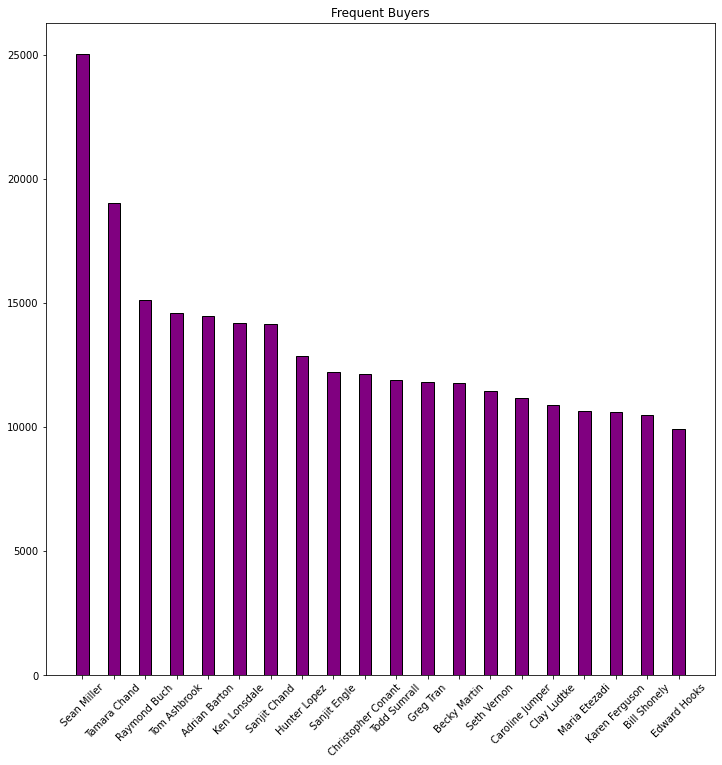

In [65]:
plt.figure(figsize = (12,12))
plt.bar(top_buyers['Customer Name'], top_buyers['Sales'], width = 0.4, ec = 'black', color = 'purple')
plt.xticks(rotation = 45)
plt.title("Frequent Buyers")
plt.show()

#### Here are the top 20 states based on revenue

In [20]:
top_state = pd.DataFrame(df.groupby(['State']).Sales.sum().sort_values( ascending = False)).reset_index().head(20)

In [21]:
top_state

,State,Sales
0,California,446306.4635
1,New York,306361.1470
2,Texas,168572.5322
3,Washington,135206.8500
4,Pennsylvania,116276.6500
5,Florida,88436.5320
6,Illinois,79236.5170
7,Michigan,76136.0740
8,Ohio,75130.3500
9,Virginia,70636.7200


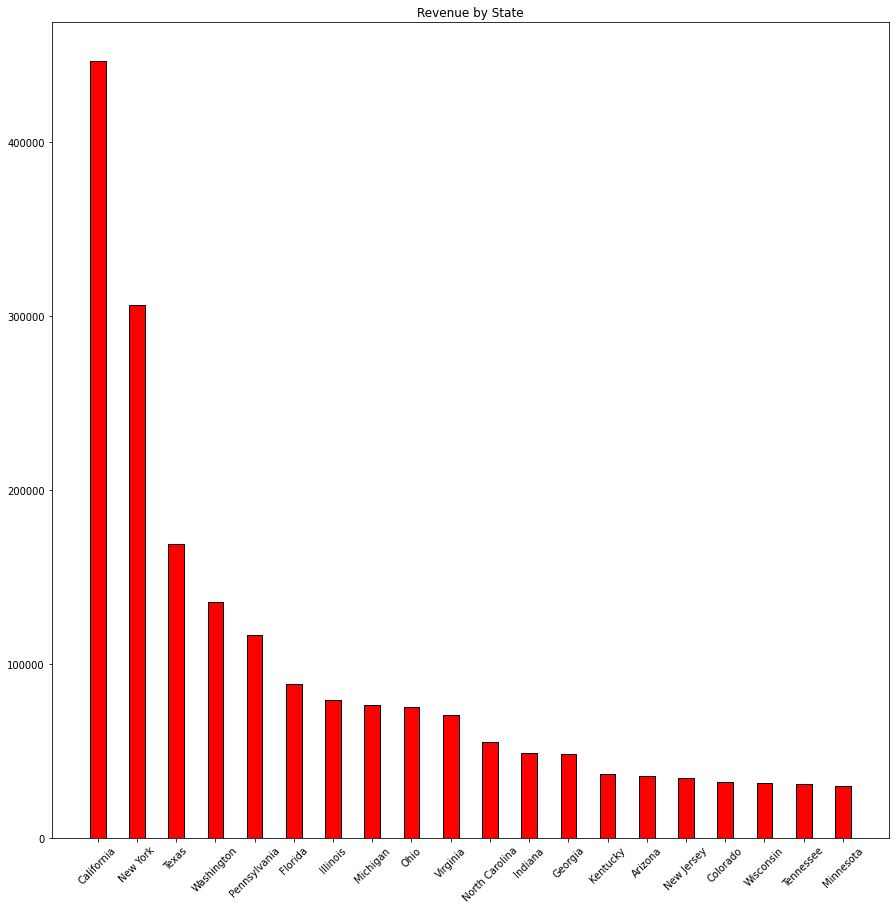

In [64]:
plt.figure(figsize = (15,15))

plt.bar(top_state.State, top_state.Sales, width = 0.4, ec = 'black', color = 'red')
plt.xticks(rotation = 45)
plt.title("Revenue by State")
plt.show()

#### Lets take a look at the most preferred shipping mode

In [23]:
df['Ship Mode'].value_counts()

Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: Ship Mode, dtype: int64

#### Lets take a look at the revenue generated by each category

In [24]:
rev_by_cat = df.groupby(['Category']).Sales.sum().sort_values(ascending = False).reset_index()
rev_by_cat

,Category,Sales
0,Technology,827455.8730
1,Furniture,728658.5757
2,Office Supplies,705422.3340


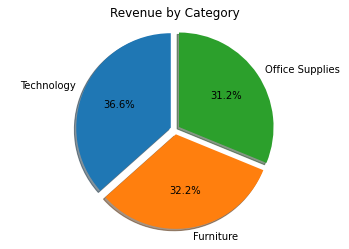

In [63]:

labels = 'Technology', 'Furniture', 'Office Supplies'
explode = (0.05 ,0.05,0.05)
sizes = rev_by_cat.Sales
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, shadow = True, startangle = 90, autopct='%1.1f%%' )
ax1.axis('equal')
plt.title("Revenue by Category")
plt.show()

#### Lets take a look at the 15 most bought items

In [26]:
df['Product Name'].value_counts()

Staple envelope                                         47
Staples                                                 46
Easy-staple paper                                       44
Avery Non-Stick Binders                                 20
Staples in misc. colors                                 18
                                                        ..
Cherry 142-key Programmable Keyboard                     1
Zebra GK420t Direct Thermal/Thermal Transfer Printer     1
Okidata B401 Printer                                     1
Lexmark X 9575 Professional All-in-One Color Printer     1
Eureka Hand Vacuum, Bagless                              1
Name: Product Name, Length: 1849, dtype: int64

In [27]:
most_bought_items= pd.DataFrame(df['Product Name'].value_counts().reset_index().head(15))

In [28]:
most_bought_items= most_bought_items.rename(columns = {'index': "Name", "Product Name": "Quantity"})
most_bought_items

,Name,Quantity
0,Staple envelope,47
1,Staples,46
2,Easy-staple paper,44
3,Avery Non-Stick Binders,20
4,Staples in misc. colors,18
5,Staple remover,18
6,Storex Dura Pro Binders,17
7,KI Adjustable-Height Table,17
8,Staple-based wall hangings,16
9,"Situations Contoured Folding Chairs, 4/Set",15


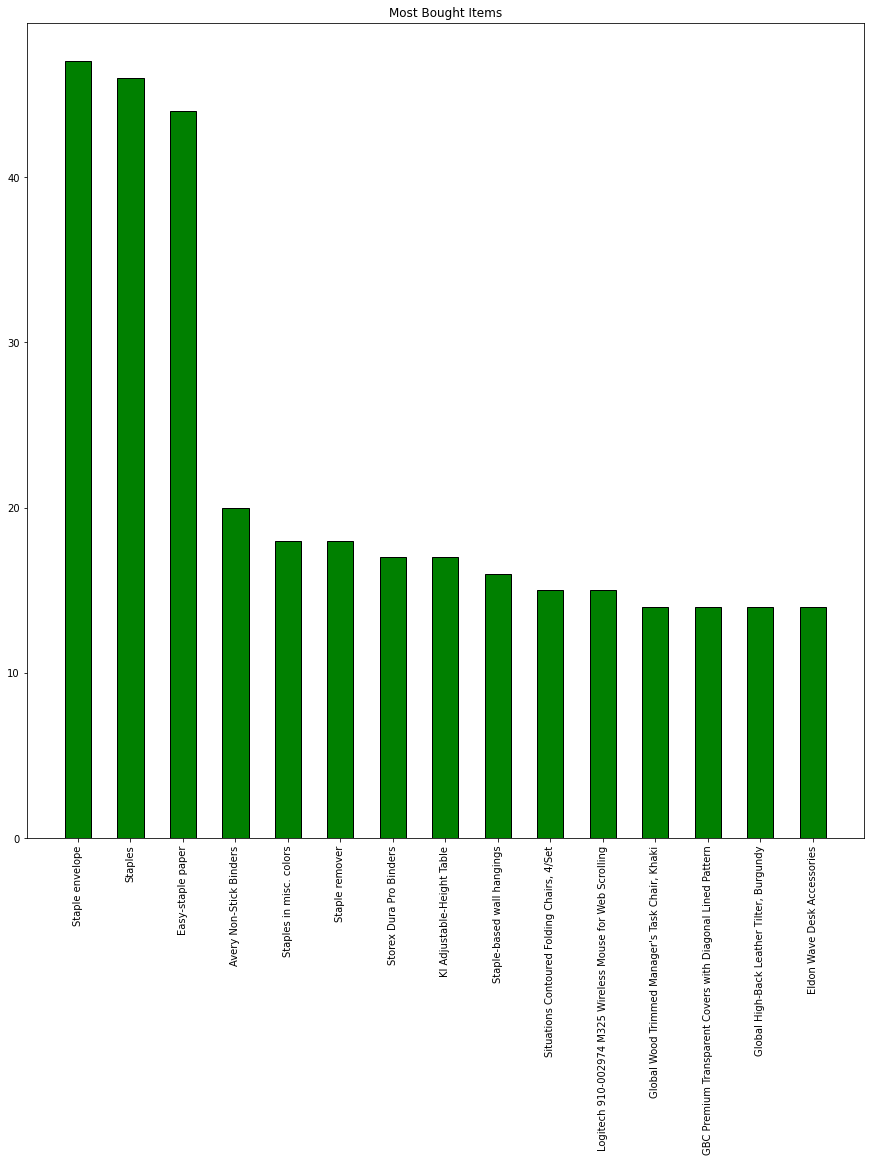

In [61]:
plt.figure(figsize = (15,15))

plt.bar(most_bought_items.Name, most_bought_items.Quantity, ec = 'black', color = 'green', width = 0.5)
plt.xticks(rotation = 90)
plt.title("Most Bought Items")
plt.show()

#### Lets take a look at the sales by region

In [30]:
regional_sales = pd.DataFrame(df.groupby("Region").Sales.sum()).reset_index()
regional_sales

,Region,Sales
0,Central,492646.9132
1,East,669518.7260
2,South,389151.4590
3,West,710219.6845


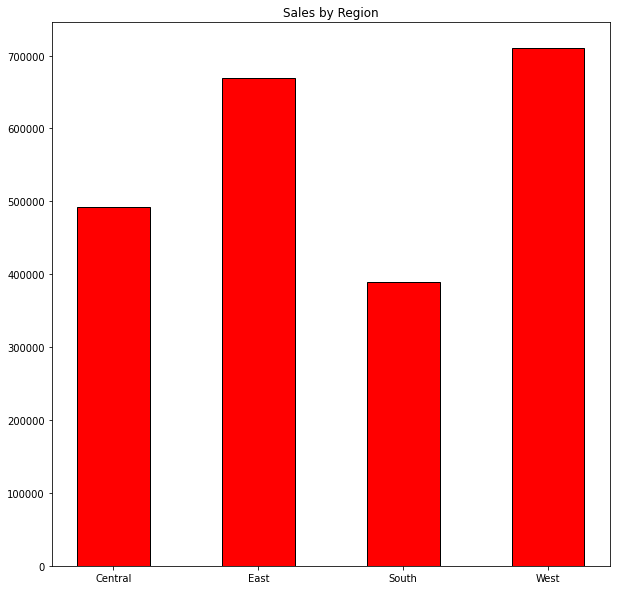

In [60]:
plt.figure(figsize = (10,10))

plt.bar(regional_sales.Region, regional_sales.Sales, ec = 'black', color = 'red', width = 0.5)
plt.title("Sales by Region")
plt.show()

#### Lets say our target variable is Sales. We are trying to analyze sales and different factors that influence it. Lets first split our data into test, train, and validate

In [36]:
train_validate, test = train_test_split(df, test_size = 0.10, random_state= 123)
train_validate.shape, test.shape

((8820, 17), (980, 17))

In [38]:
train, validate = train_test_split(train_validate, test_size = 0.10, random_state = 123)
train.shape, validate.shape

((7938, 17), (882, 17))

#### This point forward, we will do all of your analysis in the train data

In [40]:
train.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

#### lets check out the top 20 days from the duration of data collection to see our best days in terms of orders made. The goal is to see if there is pattern

In [42]:
train['Order Date'].value_counts().head(20)

10/11/2017    30
05/09/2017    29
09/12/2018    28
08/12/2018    28
01/12/2018    27
02/12/2018    27
02/09/2018    27
08/09/2015    24
24/11/2017    24
20/11/2016    23
15/09/2018    22
20/12/2015    22
19/11/2018    22
12/11/2018    22
02/10/2018    22
12/06/2017    21
08/11/2016    21
22/12/2018    21
11/12/2017    21
02/09/2017    21
Name: Order Date, dtype: int64

#### Now lets check out our top days in terms of Sales amount

In [45]:
train.groupby('Order Date').Sales.sum().sort_values(ascending = False).head(30)

Order Date
18/03/2015    28098.700
22/10/2018    14906.729
08/09/2015    13985.584
17/12/2017    12185.134
17/11/2015    11544.274
17/09/2016    11330.046
04/11/2018    10393.168
25/12/2017    10055.302
16/04/2017     9211.998
02/02/2017     8996.784
23/05/2017     8570.682
13/10/2018     8375.978
19/09/2015     8351.854
25/07/2015     8341.290
13/03/2017     8274.705
10/03/2017     7839.742
21/08/2018     7820.478
11/11/2015     7706.254
08/12/2018     7522.771
25/11/2017     7498.631
14/12/2015     7495.864
22/09/2018     7361.071
19/11/2018     7257.127
03/03/2017     7236.768
02/09/2018     7110.768
24/08/2016     7086.091
30/05/2017     7005.708
08/11/2016     6996.866
19/11/2015     6957.430
17/08/2018     6907.550
Name: Sales, dtype: float64

#### We cant really see any pattern in above analysis as the days are random, and the months are too

In [55]:
## Lets take a look at sales based on different segment
sales_by_segment = train.groupby(['Segment']).Sales.sum().sort_values(ascending = False).reset_index()
sales_by_segment 

,Segment,Sales
0,Consumer,921853.2446
1,Corporate,531192.7149
2,Home Office,362577.5707


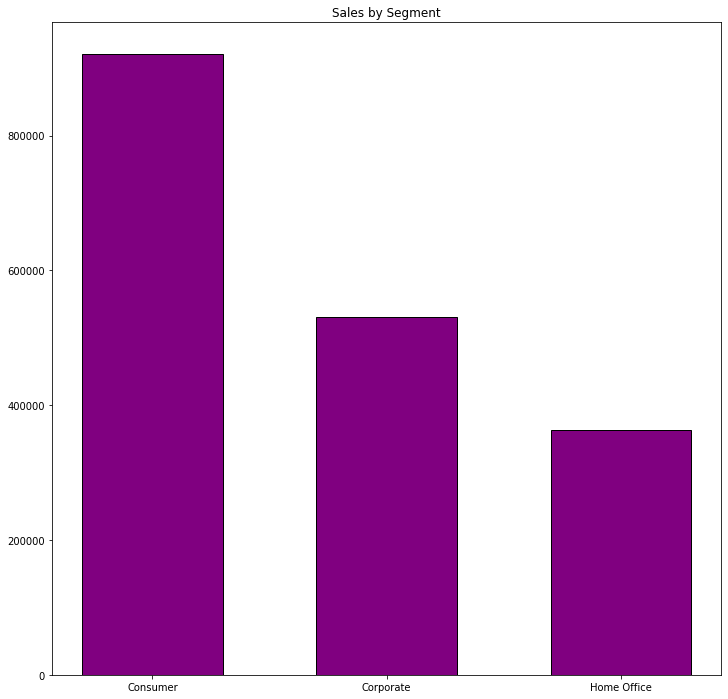

In [59]:
plt.figure(figsize = (12,12))

plt.bar(sales_by_segment.Segment, sales_by_segment.Sales, ec = 'black', color = 'purple', width = 0.6)
plt.title("Sales by Segment")
plt.show()

In [66]:
df.corr()

,Postal Code,Sales
Postal Code,1.000000,-0.025588
Sales,-0.025588,1.000000


In [70]:
dummies_df = pd.get_dummies(train.Segment, drop_first = True)
dummies_df

,Corporate,Home Office
Row ID,,
118,0,0
4973,1,0
5085,1,0
5808,0,0
561,0,0
...,...,...
6707,1,0
2445,0,0
4276,1,0
